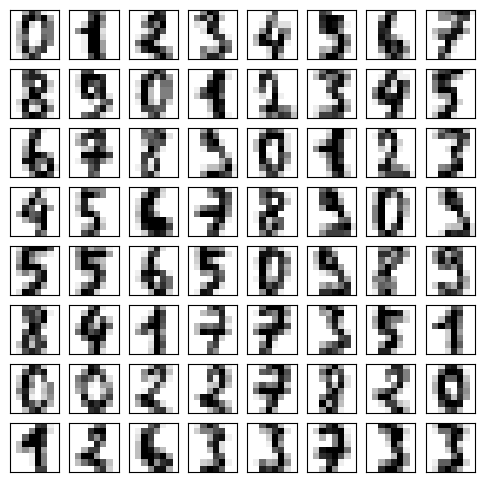

In [15]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):  # ax.flat 사용하면 2차원 배열을 1차원으로 변경해 iterable하게 만들어 준다
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

### load_digits 데이터셋은 손글씨 숫자 이미지를 포함한 8x8 픽셀 데이터를 제공하는 간단한 데이터셋: 교재 300

### NumPy 실습 과제
##### a) 데이터 이해 및 기본 처리
digits.data를 NumPy 배열로 확인하고 배열의 shape, 데이터 타입 등을 출력해 보세요.
각 샘플 이미지 데이터를 8x8 배열로 변환하여 특정 샘플 이미지를 시각화해 보세요.
각 이미지의 픽셀 값 평균을 구하세요.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits.data))
dn = digits.data
print(dn)
type(dn), dn.shape, dn.dtype

<class 'numpy.ndarray'>
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


(numpy.ndarray, (1797, 64), dtype('float64'))

In [ ]:
# dn2 = dn.reshape((dn.shape[0], 8, 8))
dn2 = dn.reshape((-1, 8, 8)) # -1은 남은 걸로 자동 계산하자

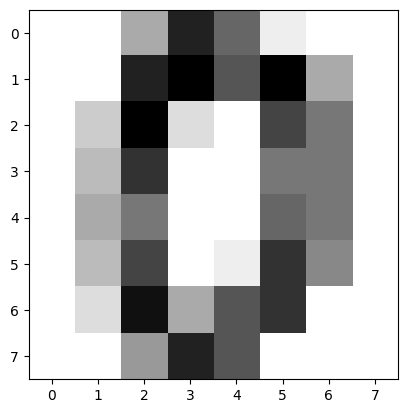

In [81]:
plt.imshow(dn2[0], interpolation='nearest', cmap='binary')

In [80]:
avg_dn = np.mean(dn, axis=1)
avg_dn, avg_dn.shape

(array([4.59375 , 4.890625, 5.375   , ..., 5.84375 , 5.375   , 6.125   ]),
 (1797,))

##### b) 숫자 필터링
타겟 값(target)이 특정 숫자(예: 3)인 샘플만 필터링하여 별도의 배열로 저장하세요.
필터링된 샘플의 평균 픽셀 값을 계산하세요.

In [59]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
type(digits.target)
target3 = digits.data[digits.target == 3] # mask 활용
target3.shape, np.mean(target3, axis=1)[:10],  np.mean(target3, axis=1).shape

((183, 64),
 array([4.171875, 5.015625, 4.46875 , 4.390625, 4.28125 , 4.3125  ,
        5.09375 , 5.109375, 4.1875  , 4.9375  ]),
 (183,))

##### c) 데이터 변환
모든 픽셀 값을 0~1 사이로 정규화하세요.

In [107]:
ma = np.max(dn)
normal = dn / ma
normal

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

(array([60367.,  6240.,  3261.,  5362.,  2627.,  6049.,  5556.,  3668.,
         7118., 14760.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

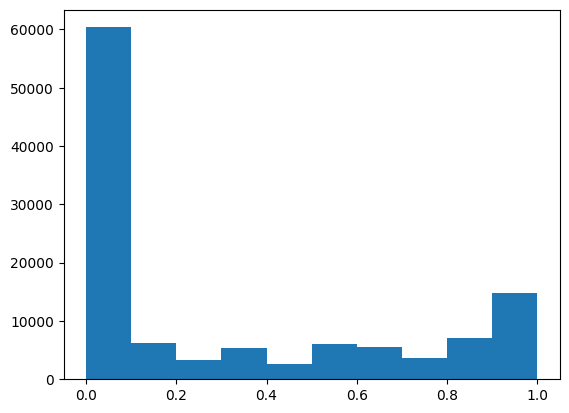

In [108]:
plt.hist(normal.flatten())

### Pandas 실습 과제
##### a) 데이터프레임 생성 및 탐색
digits.data와 digits.target을 결합하여 Pandas DataFrame을 생성하세요.
각 숫자(0~9)가 몇 개씩 포함되어 있는지 확인하세요.

In [85]:
digits.data.shape, digits.target.shape

((1797, 64), (1797,))

In [137]:
raw_data = np.hstack([digits.data, digits.target.reshape(-1,1)])
raw_data.shape

(1797, 65)

In [171]:
df = pd.DataFrame(digits.data)
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

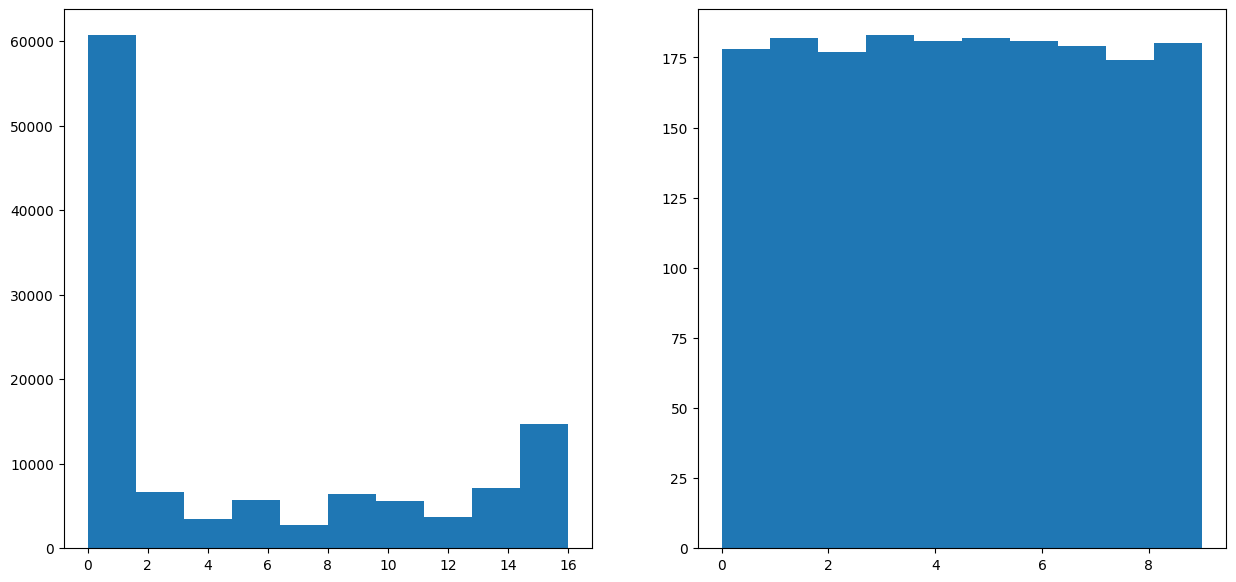

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.hist(df.values.flatten())

plt.subplot(1, 2, 2)
plt.hist(df.target)

In [159]:
help(np.unique)

Help on _ArrayFunctionDispatcher in module numpy:

unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None, *, equal_nan=True)
    Find the unique elements of an array.
    
    Returns the sorted unique elements of an array. There are three optional
    outputs in addition to the unique elements:
    
    * the indices of the input array that give the unique values
    * the indices of the unique array that reconstruct the input array
    * the number of times each unique value comes up in the input array
    
    Parameters
    ----------
    ar : array_like
        Input array. Unless `axis` is specified, this will be flattened if it
        is not already 1-D.
    return_index : bool, optional
        If True, also return the indices of `ar` (along the specified axis,
        if provided, or in the flattened array) that result in the unique array.
    return_inverse : bool, optional
        If True, also return the indices of the unique array (for the sp

In [161]:
np.unique(digits.target, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [162]:
freq_target = df['target'].value_counts()
freq_target.sort_index(inplace=True)
print('target 값의 빈도', freq_target)

target 값의 빈도 target
0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: count, dtype: int64


<Axes: xlabel='target'>

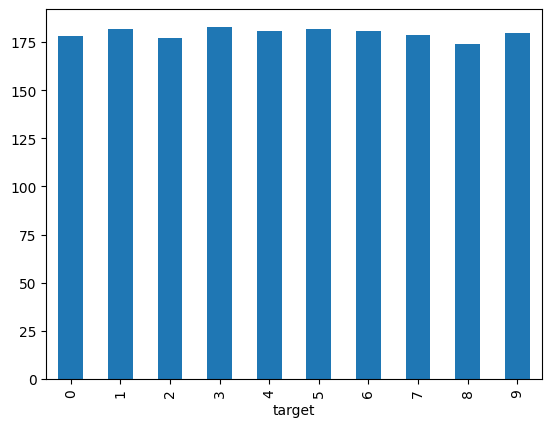

In [163]:
freq_target.plot.bar()

##### b) 숫자별 통계
각 숫자(0~9)에 대해 평균 픽셀 값을 계산하여 새로운 DataFrame으로 나타내세요.
숫자별로 가장 밝은(최대 픽셀 값이 높은) 이미지를 찾으세요.

In [168]:
df.iloc[:, :-1].mean(axis=1)

0       4.593750
1       4.890625
2       5.375000
3       4.171875
4       4.031250
          ...   
1792    5.312500
1793    6.234375
1794    5.843750
1795    5.375000
1796    6.125000
Length: 1797, dtype: float64

In [ ]:
mean_pixel = []
max_pixel = []
bin = df['target'].unique()

for i in bin:
  arr = digits.data[digits.target == i]
  mean_pixel.append(np.mean(arr))
  max_pixel.append(np.max(arr))

stat_df = pd.DataFrame({'mean_pixel':mean_pixel, 'max_pixel':max_pixel})
stat_df

,mean_pixel,max_pixel
0,4.952159,16.0
1,4.894145,16.0
2,4.905191,16.0
3,4.794314,16.0
4,4.854886,16.0
5,4.800395,16.0
6,4.863260,16.0
7,4.738914,16.0
8,5.155172,16.0
9,4.895139,16.0


In [176]:
for target, group in df.groupby('target'):
  print(target, group.iloc[:, :-1].mean(axis=1).argmax())
  print(target, group.iloc[:, :-1].mean(axis=1).idxmax())

0 20
0 185
1 81
1 818
2 62
2 629
3 137
3 1349
4 96
4 988
5 46
5 457
6 39
6 402
7 110
7 1113
8 86
8 898
9 47
9 491


##### c) 데이터 시각화
각 숫자(0~9)에 대해 샘플 이미지를 시각화하는 함수 plot_sample_images를 작성하세요.
숫자별 픽셀 값 분포를 박스 플롯(Box plot)으로 그리세요.

In [149]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [150]:
digits.images.shape, digits.target.shape

((1797, 8, 8), (1797,))

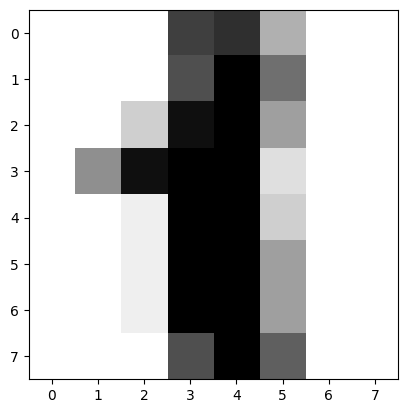

In [151]:
def plot_sample_images(i):
  df = digits.images[digits.target == i]
  plt.imshow(df[0], cmap='binary')

plot_sample_images(1)

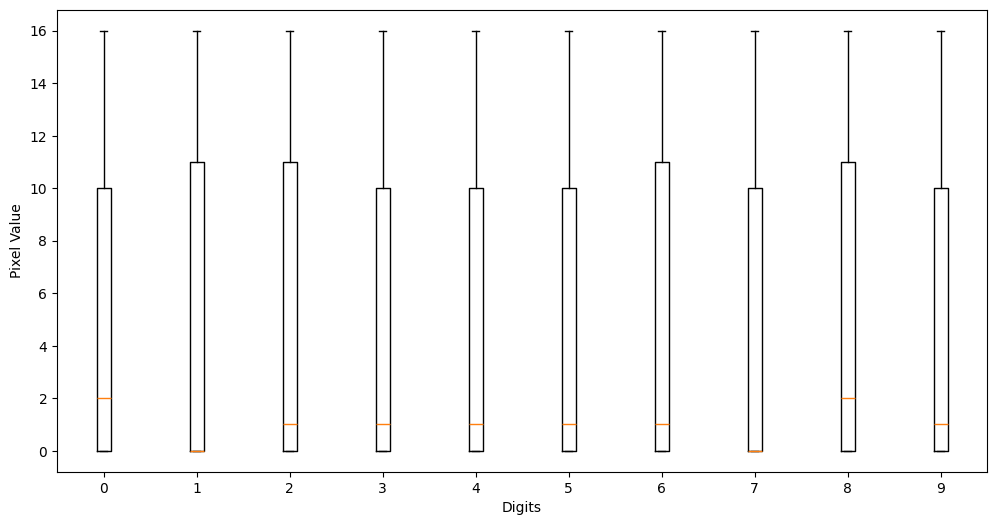

In [178]:
unique_digits = sorted(df['target'].unique())
plt.figure(figsize=(12, 6))

for digit in unique_digits:
  group_data = df[df['target'] == digit].iloc[:, :-1].values.flatten()
  plt.boxplot(group_data, positions=[digit])

plt.xlabel('Digits')
plt.ylabel('Pixel Value')
plt.xticks(ticks=unique_digits, labels=unique_digits)
plt.show()

### 종합 과제
##### a) 이미지 분류 모델
DataFrame에서 target 열을 제외한 데이터를 NumPy 배열로 변환하세요.
분류를 위해 데이터를 훈련 세트와 테스트 세트로 나누세요.
간단한 k-NN 또는 SVM 모델을 사용하여 숫자를 분류하는 코드를 작성하세요.

##### b) EDA(탐색적 데이터 분석)
각 숫자의 평균 이미지를 생성하여 시각화하세요.
숫자별로 데이터의 분포를 비교하는 히스토그램을 작성하세요.

### 5장 과제
- PCA를 사용한 차원 축소: digits.data의 차원을 줄여 2D 또는 3D로 시각화하세요.

- 군집화: K-Means 알고리즘을 사용하여 데이터 포인트를 10개의 클러스터로 나누고 결과를 시각화하세요.